# EXAMPLE: Using aweSOM to segment 4-dimensional multiclass classification data from the iris dataset (https://archive.ics.uci.edu/dataset/53/iris)

## SOM

Import aweSOM and iris dataset

In [1]:
from aweSOM import Lattice
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


Basic information about the dataset

In [2]:
iris = load_iris()

print("Shape of the data :", iris.data.shape)
print("Labeled classes :", iris.target_names)
print("Features in the set :", iris.feature_names)

Shape of the data : (150, 4)
Labeled classes : ['setosa' 'versicolor' 'virginica']
Features in the set : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Visualize the dataset in a few different ways

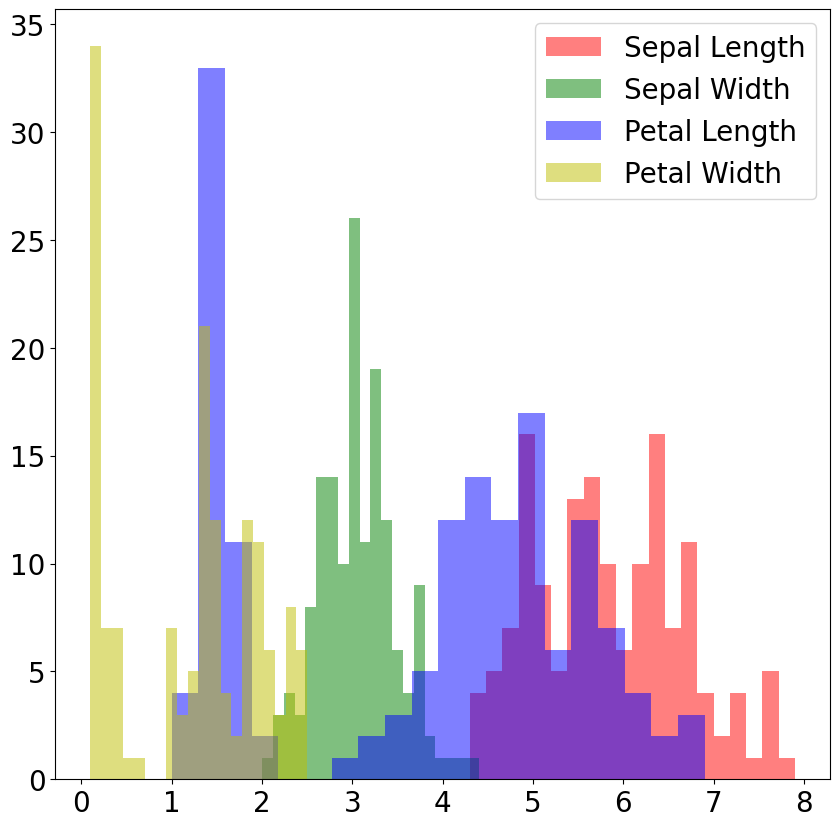

In [3]:
plt.rcParams.update({'font.size': 20})

# Histogram
plt.figure(figsize=(10, 10))
plt.hist(iris.data[:,0], bins=20, color='r', alpha=0.5, label='Sepal Length')
plt.hist(iris.data[:,1], bins=20, color='g', alpha=0.5, label='Sepal Width')
plt.hist(iris.data[:,2], bins=20, color='b', alpha=0.5, label='Petal Length')
plt.hist(iris.data[:,3], bins=20, color='y', alpha=0.5, label='Petal Width')
plt.legend()
plt.show()

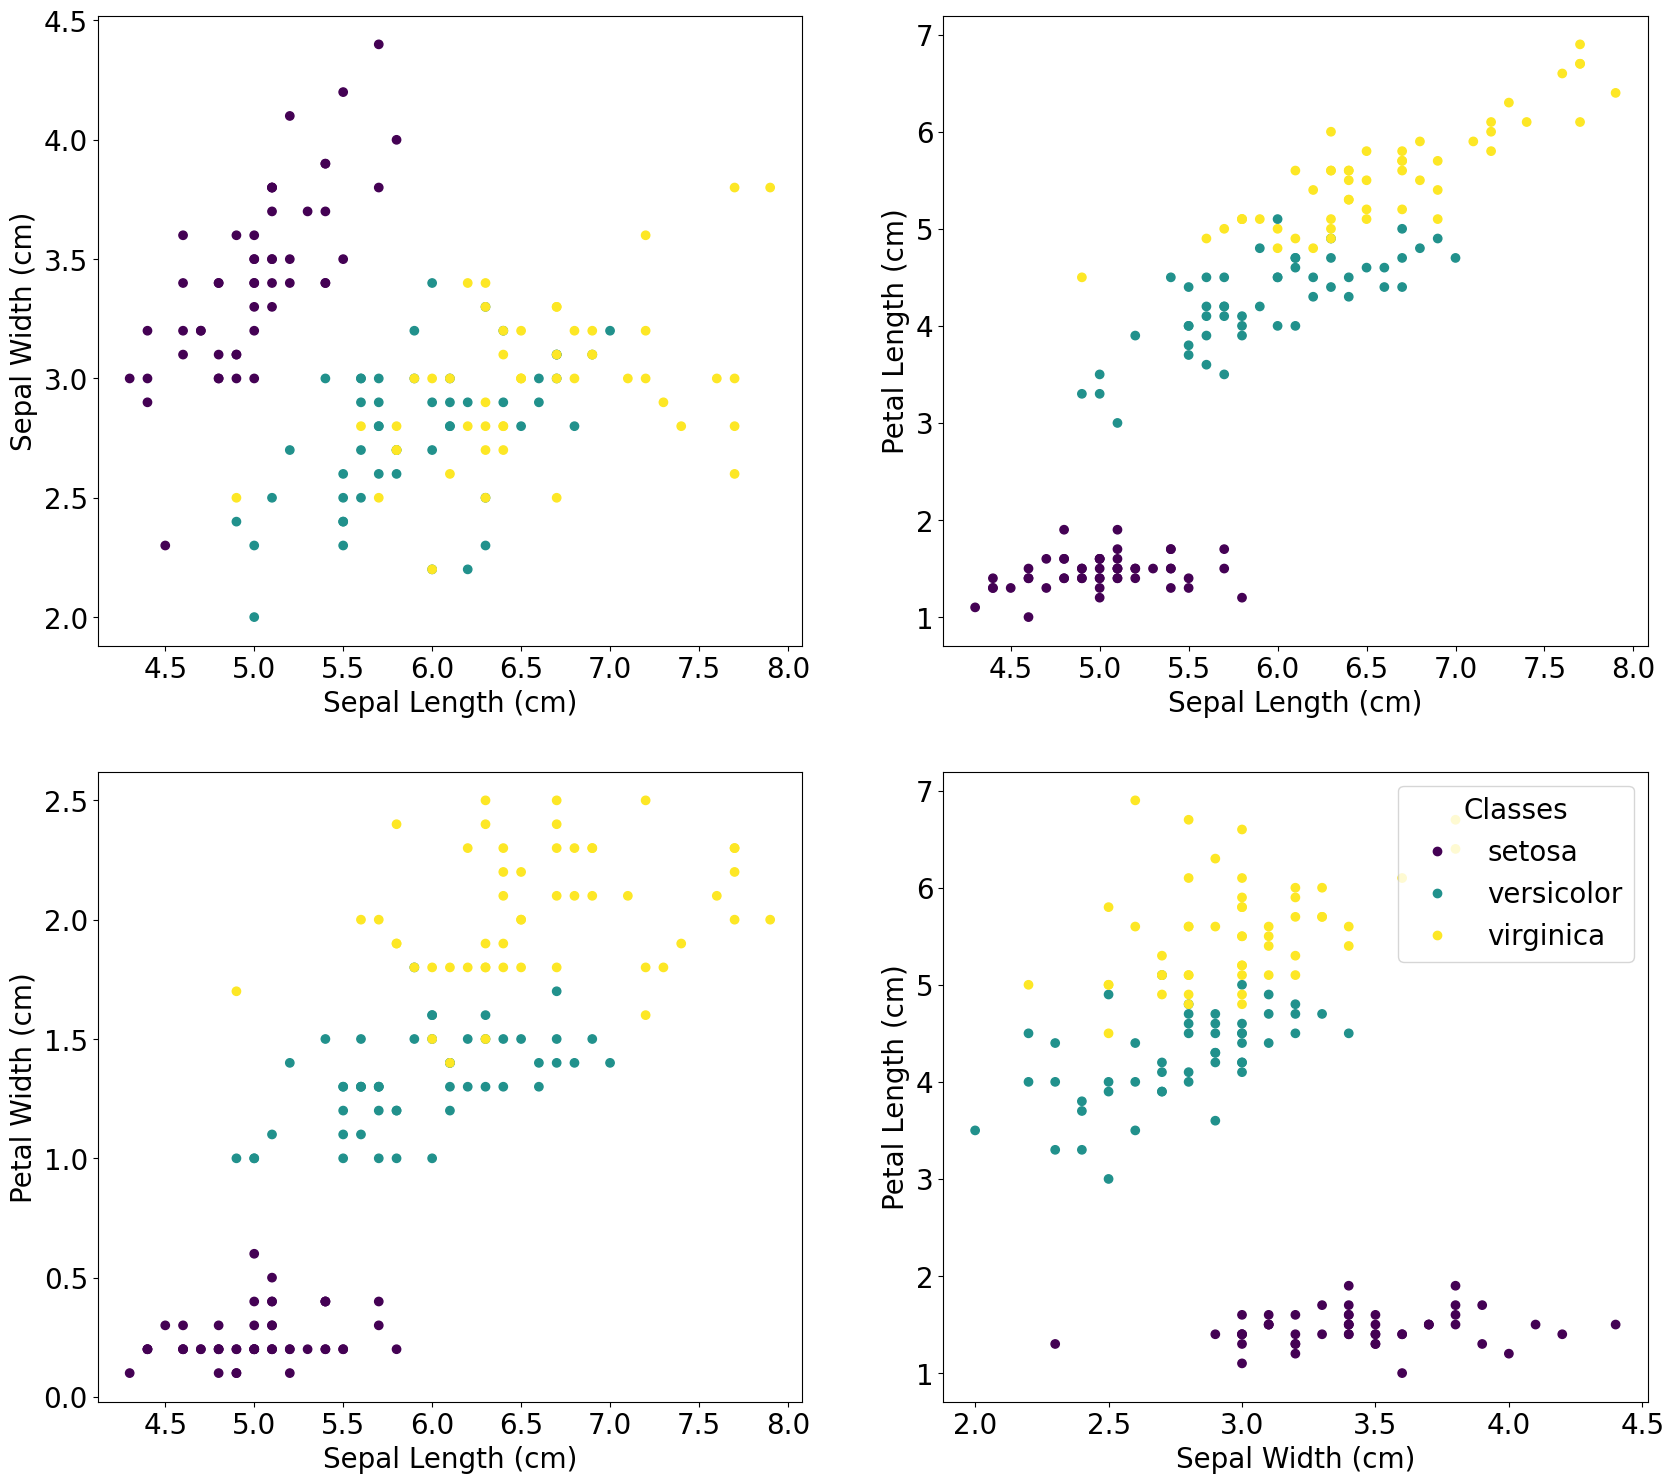

In [5]:
# Scatter plots
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
scatter = axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=iris.target, cmap='viridis')
axs[0,0].set_xlabel('Sepal Length (cm)')
axs[0,0].set_ylabel('Sepal Width (cm)')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='viridis')
axs[0,1].set_xlabel('Sepal Length (cm)')
axs[0,1].set_ylabel('Petal Length (cm)')
axs[1,0].scatter(iris.data[:,0], iris.data[:,3], c=iris.target, cmap='viridis')
axs[1,0].set_xlabel('Sepal Length (cm)')
axs[1,0].set_ylabel('Petal Width (cm)')
axs[1,1].scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap='viridis')
axs[1,1].set_xlabel('Sepal Width (cm)')
axs[1,1].set_ylabel('Petal Length (cm)')
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")

Pre-processing step : normalize data with either MinMaxScaler (shift the distribution to between 0 and 1) or StandardScaler (shift the mean to 0 and standard deviation of the sample to 1). Here we use the custom scaler described in Ha et al. 2024

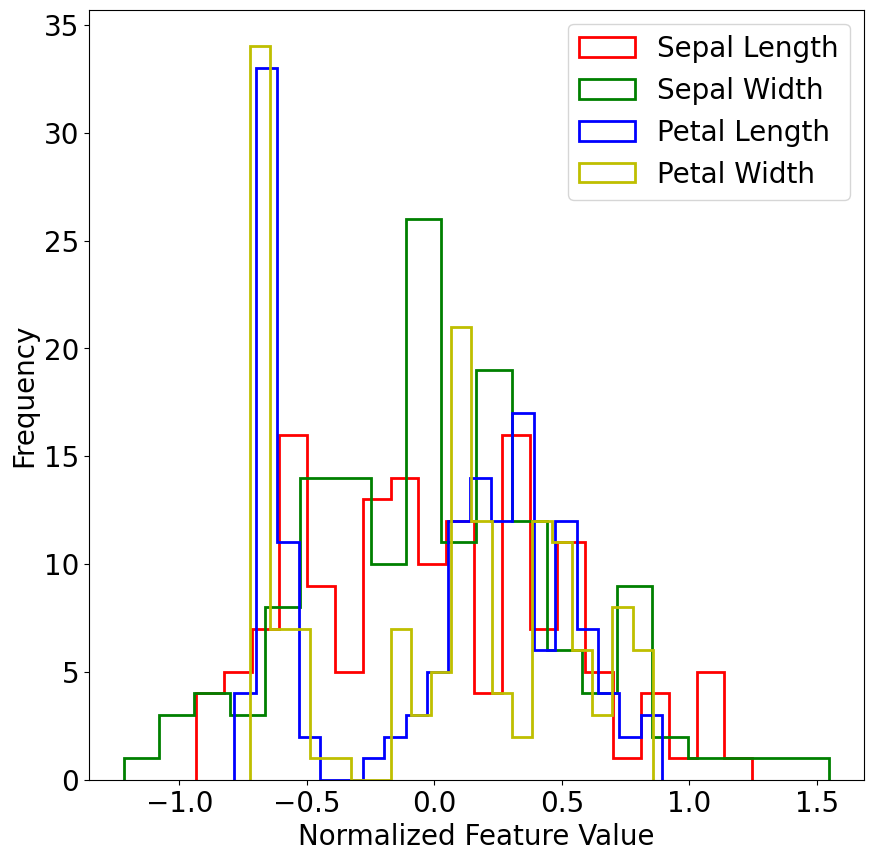

In [6]:
import aweSOM.run_som as rs
iris_data_transformed = rs.manual_scaling(iris.data)

plt.figure(figsize=(10, 10))
plt.hist(iris_data_transformed[:,0], bins=20, color='r', label='Sepal Length', histtype='step', linewidth=2)
plt.hist(iris_data_transformed[:,1], bins=20, color='g', label='Sepal Width', histtype='step', linewidth=2)
plt.hist(iris_data_transformed[:,2], bins=20, color='b', label='Petal Length', histtype='step', linewidth=2)
plt.hist(iris_data_transformed[:,3], bins=20, color='y', label='Petal Width', histtype='step', linewidth=2)
plt.xlabel('Normalized Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Example lattice: SOM run with xdim = 20, ydim = 8, alpha_0 = 0.5, N = 10000, decaying alpha, sampling data points as initial weights

Initialize the SOM map

In [7]:
xdim, ydim = 20, 8 # small map since there are only 150 samples
alpha_0 = 1.
train = 1000000

print(f'constructing aweSOM lattice for xdim={xdim}, ydim={ydim}, alpha={alpha_0}, train={train}...', flush=True)
map=Lattice(xdim, ydim, alpha_0, train, )

constructing aweSOM lattice for xdim=20, ydim=8, alpha=1.0, train=1000000...


Train the SOM with only one batch

In [8]:
labels = iris.target
feature_names = iris.feature_names

map.train_lattice(iris_data_transformed,feature_names,labels,)
lattice = map.lattice

starting epoch is:  0
stopping epoch is:  1000000
Saving lattice every  5000  epochs
Begin training
Evaluating epoch =  0
Decaying learning rate to 0.75 at epoch 40000
Decaying learning rate to 0.5625 at epoch 80000
Evaluating epoch =  100000
Decaying learning rate to 0.421875 at epoch 120000
Decaying learning rate to 0.31640625 at epoch 160000
Evaluating epoch =  200000
Decaying learning rate to 0.2373046875 at epoch 200000
Decaying learning rate to 0.177978515625 at epoch 240000
Decaying learning rate to 0.13348388671875 at epoch 280000
Evaluating epoch =  300000
Decaying learning rate to 0.1001129150390625 at epoch 320000
Decaying learning rate to 0.07508468627929688 at epoch 360000
Evaluating epoch =  400000
Decaying learning rate to 0.056313514709472656 at epoch 400000
Decaying learning rate to 0.04223513603210449 at epoch 440000
Decaying learning rate to 0.03167635202407837 at epoch 480000
Evaluating epoch =  500000
Shrinking neighborhood size to 21 at epoch 519210
Decaying learn

Visualize result with Umatrix

Text(0.5, 1.0, 'UMatrix for 20x8 SOM')

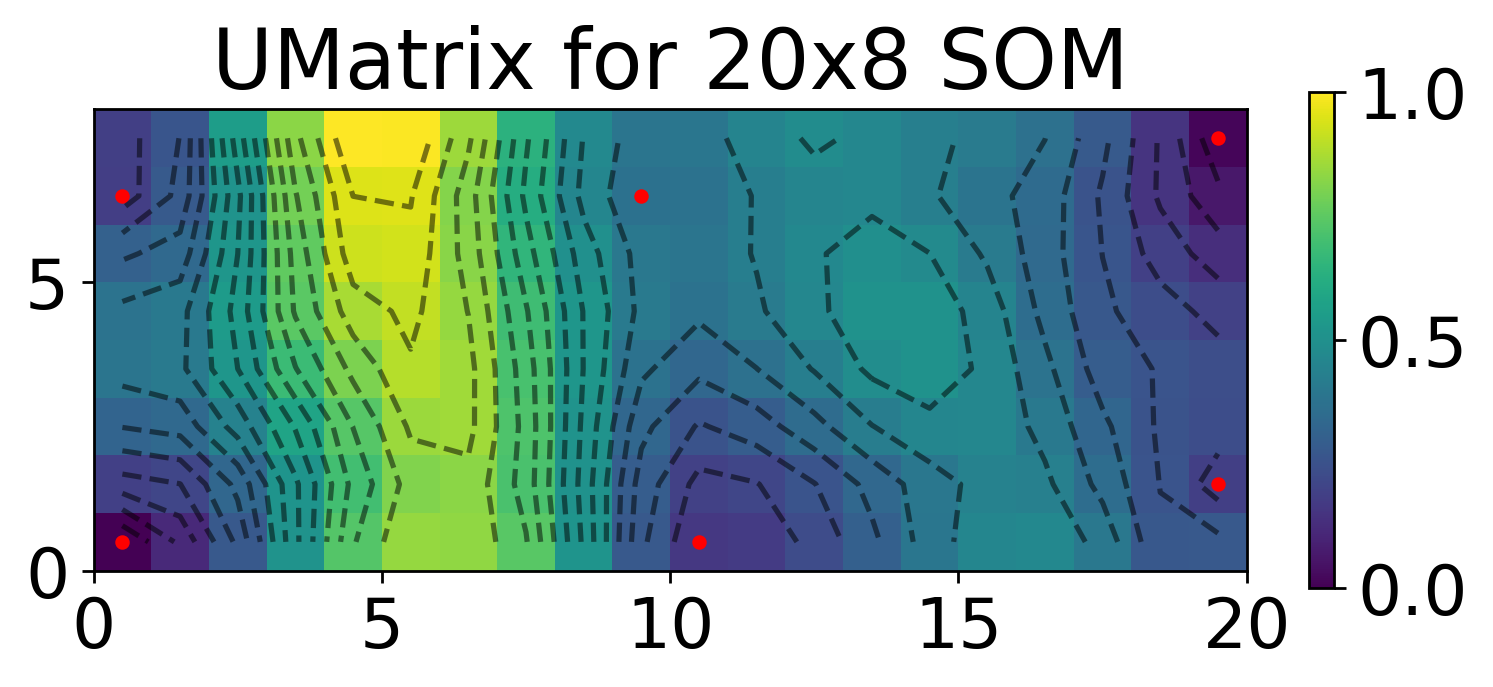

In [12]:
map.umat = map.compute_umat(smoothing=None)
unique_centroids = map.get_unique_centroids(map.compute_centroids())

unique_centroids['position_x'] = [x+0.5 for x in unique_centroids['position_x']]
unique_centroids['position_y'] = [y+0.5 for y in unique_centroids['position_y']]

X,Y = np.meshgrid(np.arange(xdim)+0.5, np.arange(ydim)+0.5)

plt.figure(dpi=250)
plt.pcolormesh(np.log10(map.umat.T), cmap='viridis')
plt.scatter(unique_centroids['position_x'],unique_centroids['position_y'], color='red', s=10)
plt.colorbar(fraction=0.02)
plt.contour(X, Y, np.log10(map.umat.T), levels=np.linspace(np.log10(np.min(map.umat)),np.log10(np.max(map.umat)), 20), colors='black', alpha=0.5)
plt.gca().set_aspect("equal")
plt.title(rf'UMatrix for {xdim}x{ydim} SOM')

In [13]:
print('Number of centroids:', len(unique_centroids['position_x']))

Number of centroids: 6


You can also look at the history of the map with umat_history (and lattice_history)

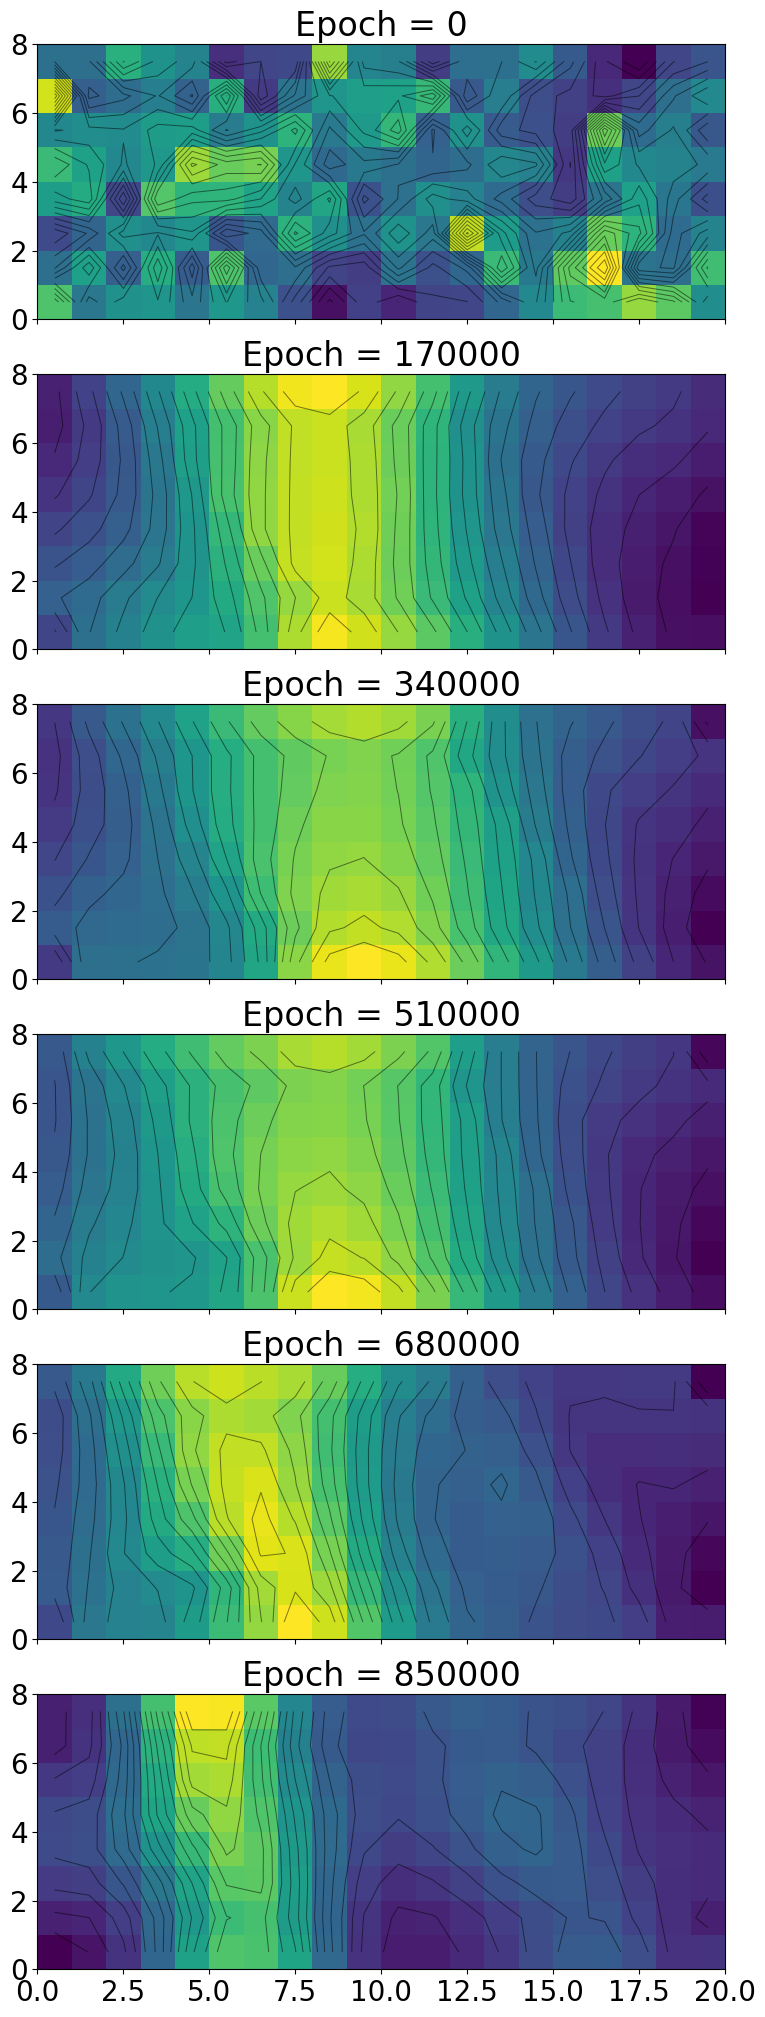

In [14]:
lattice_history = np.array(map.lattice_history)
umat_history = np.array(map.umat_history)
steps = np.linspace(0, lattice_history.shape[0] * map.save_frequency, lattice_history.shape[0], endpoint=False, dtype=int)

xdim = map.xdim
ydim = map.ydim
alpha_0 = map.alpha_0
train = map.train
X,Y = np.meshgrid(np.arange(xdim)+0.5, np.arange(ydim)+0.5)


num_plots = 6
fig, axs = plt.subplots(6, 1, figsize=(10, 25), sharex=True)
fig.subplots_adjust(hspace=0.2)
for i, k in enumerate(range(0, umat_history.shape[0], len(steps)//num_plots+1)):
    umat = umat_history[k]

    axs[i].title.set_text(f'Epoch = {steps[k]}')
    mesh = axs[i].pcolormesh(umat.T, cmap='viridis')
    axs[i].contour(X, Y, umat.T, levels=np.linspace(np.min(umat),np.max(umat), 20), colors='black', alpha=0.5, linewidths=0.7)
    axs[i].set_aspect("equal")


Merge similar centroids

In [15]:
map.umat = map.compute_umat(smoothing=None)
naive_centroids = map.compute_centroids()
merge_threshold = 0.2
merged_centroids = map.merge_similar_centroids(naive_centroids, threshold=merge_threshold)

Centroid A: (np.int64(19), np.int64(7)), Umatrix value: 0.0003511703481474065
Centroid B: (np.int64(19), np.int64(1)), Umatrix value: 0.0004560917569002034
Merging...
Centroid A: (np.int64(0), np.int64(0)), Umatrix value: 0.0003436277397393774
Centroid B: (np.int64(0), np.int64(6)), Umatrix value: 0.0004543897703747299
Merging...
Centroid A: (np.int64(9), np.int64(6)), Umatrix value: 0.0006076985094024496
Centroid B: (np.int64(10), np.int64(0)), Umatrix value: 0.0004402502109274415
Merging...
Number of unique centroids:  3
Minimum cost between centroids:  0.3130160139877907


Visualize new centroids after merging

Centroid A: (np.int64(19), np.int64(7)), Umatrix value: 0.0003511703481474065
Centroid B: (np.int64(19), np.int64(1)), Umatrix value: 0.0004560917569002034
Merging...
Centroid A: (np.int64(0), np.int64(0)), Umatrix value: 0.0003436277397393774
Centroid B: (np.int64(0), np.int64(6)), Umatrix value: 0.0004543897703747299
Merging...
Centroid A: (np.int64(9), np.int64(6)), Umatrix value: 0.0006076985094024496
Centroid B: (np.int64(10), np.int64(0)), Umatrix value: 0.0004402502109274415
Merging...
Number of unique centroids:  3
Minimum cost between centroids:  0.3130160139877907
Unique centroids :  {'position_x': [np.int64(19), np.int64(10), np.int64(0)], 'position_y': [np.int64(7), np.int64(0), np.int64(0)]}
Begin matching points with nodes
i = i =  30
i =  45
i =  60
i =  75
i =  15
i =  0
i =  135
i =  90
i =  120
 105


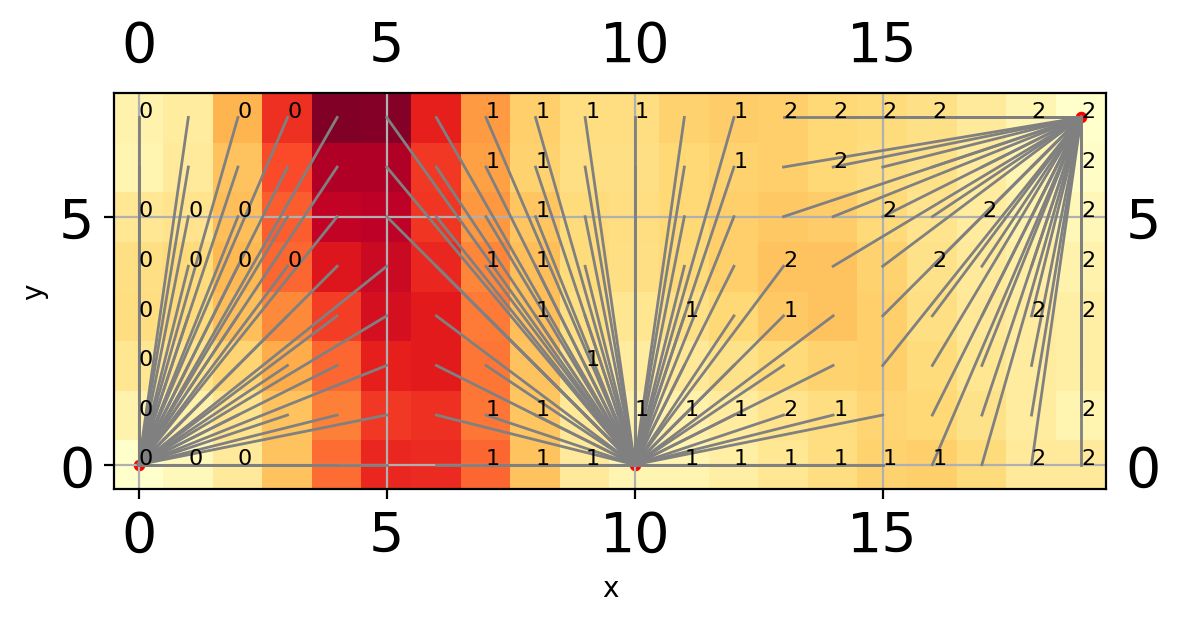

In [16]:
map.plot_heat(map.umat, merge=True, merge_cost=merge_threshold)

Project data onto lattice

Centroid A: (np.int64(19), np.int64(7)), Umatrix value: 0.0003511703481474065
Centroid B: (np.int64(19), np.int64(1)), Umatrix value: 0.0004560917569002034
Merging...
Centroid A: (np.int64(0), np.int64(0)), Umatrix value: 0.0003436277397393774
Centroid B: (np.int64(0), np.int64(6)), Umatrix value: 0.0004543897703747299
Merging...
Centroid A: (np.int64(9), np.int64(6)), Umatrix value: 0.0006076985094024496
Centroid B: (np.int64(10), np.int64(0)), Umatrix value: 0.0004402502109274415
Merging...
Number of unique centroids:  3
Minimum cost between centroids:  0.3130160139877907
Number of clusters : 3
Centroids:  [(np.int64(19), np.int64(7)), (np.int64(10), np.int64(0)), (np.int64(0), np.int64(0))]


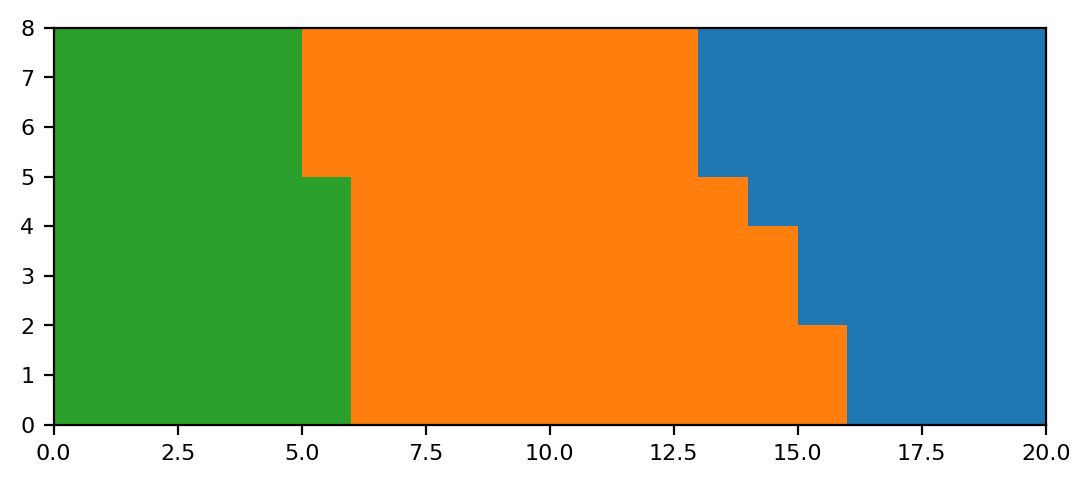

In [17]:
final_clusters = map.assign_cluster_to_lattice(smoothing=None,merge_cost=merge_threshold)

plt.figure(dpi=200)
plt.pcolormesh(final_clusters.T, cmap='tab10', clim=[0,10])
plt.gca().set_aspect("equal")
plt.show()

Map cluster ids back to each data point

In [18]:
som_labels = map.assign_cluster_to_data(map.projection_2d, final_clusters)

Scatter plot of cluster ids from SOM

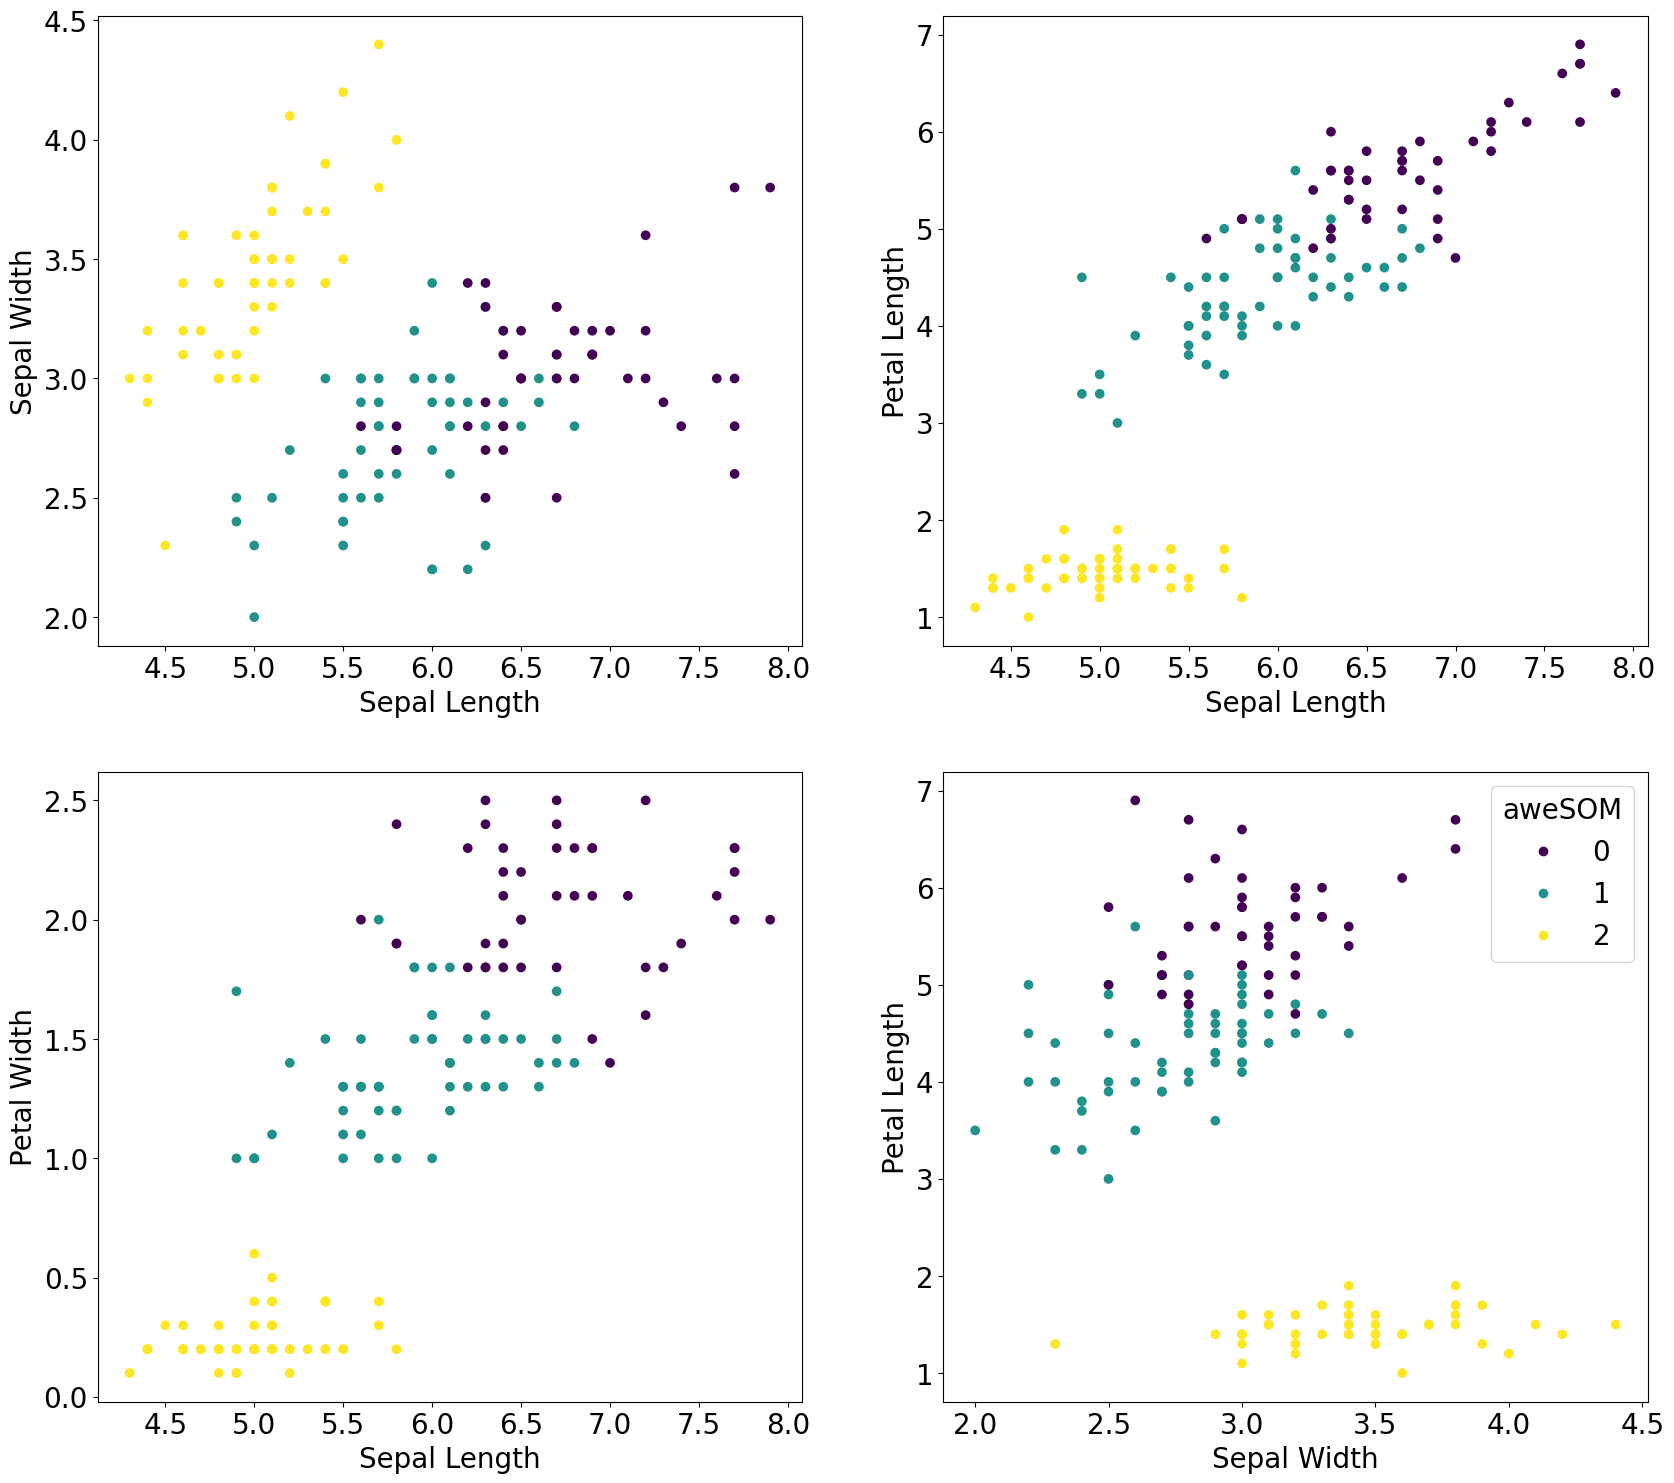

In [19]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
scatter = axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=som_labels, cmap='viridis')
axs[0,0].set_xlabel('Sepal Length')
axs[0,0].set_ylabel('Sepal Width')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=som_labels, cmap='viridis')
axs[0,1].set_xlabel('Sepal Length')
axs[0,1].set_ylabel('Petal Length')
axs[1,0].scatter(iris.data[:,0], iris.data[:,3], c=som_labels, cmap='viridis')
axs[1,0].set_xlabel('Sepal Length')
axs[1,0].set_ylabel('Petal Width')
axs[1,1].scatter(iris.data[:,1], iris.data[:,2], c=som_labels, cmap='viridis')
axs[1,1].set_xlabel('Sepal Width')
axs[1,1].set_ylabel('Petal Length')
axs[1,1].legend(scatter.legend_elements()[0], np.unique(final_clusters), loc="upper right", title="aweSOM")

Visualize a 2d projection between ground truth and aweSOM result

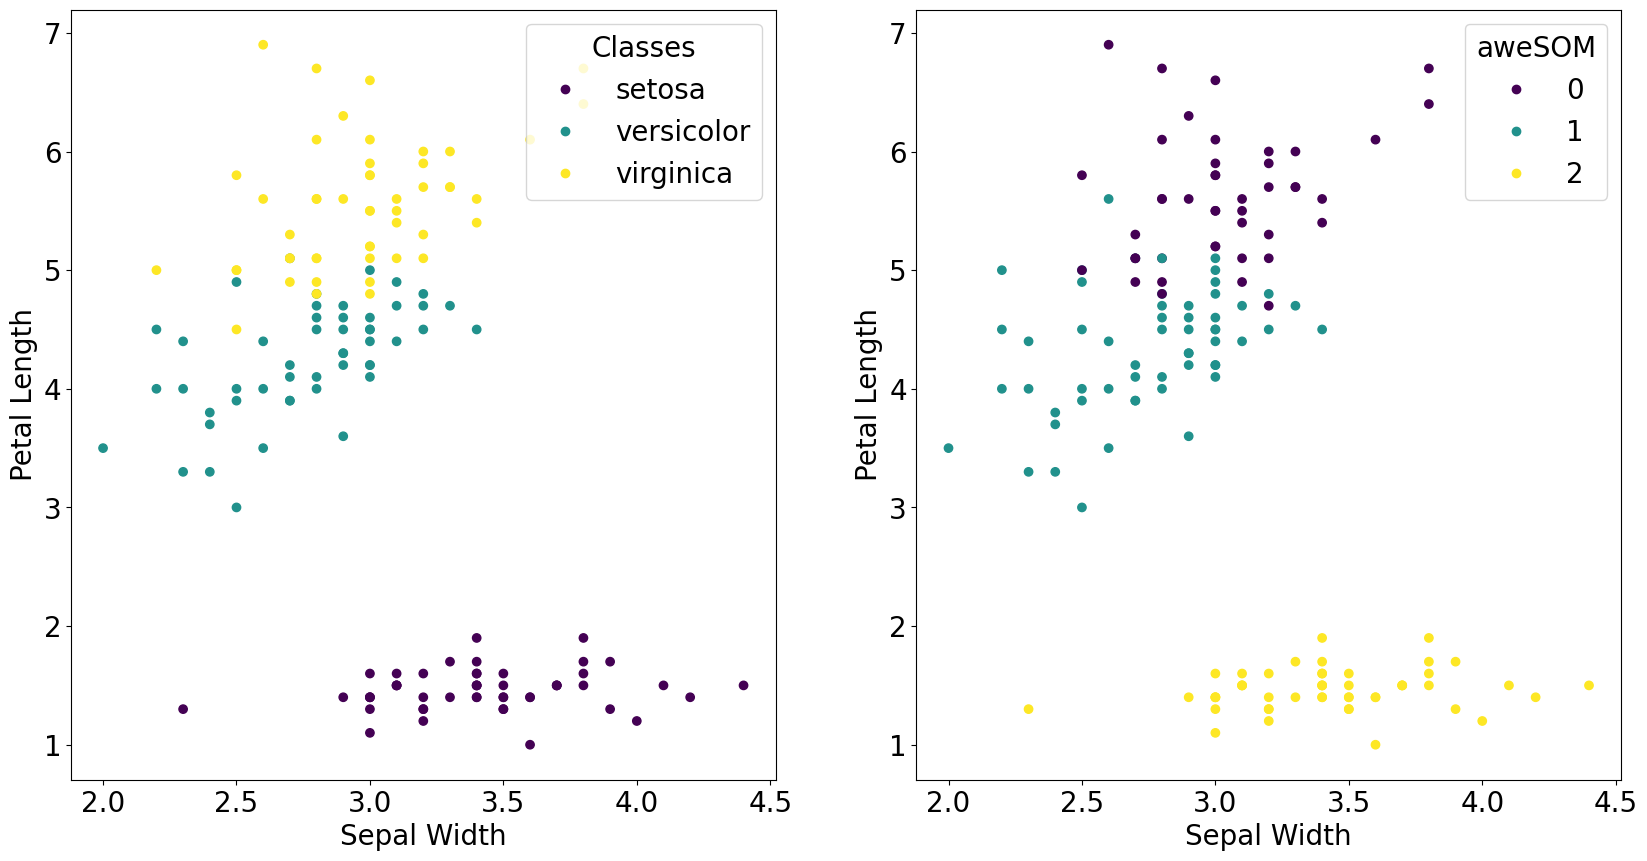

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
scatter_ground = axs[0].scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap='viridis')
axs[0].set_xlabel('Sepal Width')
axs[0].set_ylabel('Petal Length')
axs[0].legend(scatter_ground.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")
scatter_som = axs[1].scatter(iris.data[:,1], iris.data[:,2], c=som_labels, cmap='viridis')
axs[1].set_xlabel('Sepal Width')
axs[1].set_ylabel('Petal Length')
axs[1].legend(scatter_som.legend_elements()[0], np.unique(final_clusters), loc="upper right", title="aweSOM")
plt.show()

Compare the real label to the inferred label

In [21]:
# Assign cluster number to class label; change manually
label_map = {
    'setosa' : 2, 
    'versicolor' : 1, 
    'virginica' : 0,
    }
correct_label = 0

for i in range(len(som_labels)):
    if int(som_labels[i]) == label_map[iris.target_names[iris.target[i]]]:
        correct_label += 1

print("Number of correct predictions: ", correct_label)
print("Accuracy = ", correct_label/len(som_labels) * 100, "%")

# Precision and Recall by class
precision = np.zeros(3)
recall = np.zeros(3)

for i in range(3):
    tp = 0
    fp = 0
    fn = 0
    for j in range(len(som_labels)):
        if int(som_labels[j]) == label_map[iris.target_names[i]]:
            if iris.target[j] == i:
                tp += 1
            else:
                fp += 1
        else:
            if iris.target[j] == i:
                fn += 1
    precision[i] = tp/(tp+fp)
    recall[i] = tp/(tp+fn)

print("Precision: ", [float(np.round(precision[i],4))*100 for i in range(3)], "%")
print("Recall: ", [float(np.round(recall[i],4))*100 for i in range(3)], "%")


Number of correct predictions:  140
Accuracy =  93.33333333333333 %
Precision:  [100.0, 85.71, 95.45] %
Recall:  [100.0, 96.0, 84.0] %


Save SOM object

In [45]:
import pickle
with open('iris_som.pkl', 'wb') as f:
    pickle.dump(map, f)

## SCE

Now we run multiple SOM realizations to obtain SCE clustering

There are files already saved in `examples/iris/som_results`; run this cell only if you want to generate a different set of aweSOM realizations

In [8]:
from aweSOM.run_som import save_cluster_labels
parameters = {"xdim": [38, 40, 42], "ydim": [14, 16], "alpha_0": [0.1, 0.5], "train": [10000, 50000, 100000]}
merge_threshold = 0.2

for xdim in parameters["xdim"]:
    for ydim in parameters["ydim"]:
        for alpha_0 in parameters["alpha_0"]:
            for train in parameters["train"]:
                print(f'constructing aweSOM lattice for xdim={xdim}, ydim={ydim}, alpha={alpha_0}, train={train}...', flush=True)
                map = Lattice(xdim, ydim, alpha_0, train, )
                map.train_lattice(iris_data_transformed, feature_names, labels)
                # map.umat = map.compute_umat()
                projection_2d = map.map_data_to_lattice()
                final_clusters = map.assign_cluster_to_lattice(smoothing=None, merge_cost=merge_threshold)
                som_labels = map.assign_cluster_to_data(projection_2d, final_clusters)
                save_cluster_labels(som_labels, xdim, ydim, alpha_0, train, name_of_dataset='iris')

The code above will generate a number of aweSOM realizations following the parameter space specified. Switch to terminal and do:

```bash
cd [path_to_working_dir]
mkdir som_results
mv labels* som_results/
cd som_results/
python3 [path_to_aweSOM]/aweSOM/src/aweSOM/sce.py --subfolder SCE --dims 150
```

This will create (or append to) the `multimap_mappings.txt` file inside `som_results/SCE/` with the $G_{\rm sum}$ for each cluster. It also save the mask for each cluster $C$ as a `.npy` file.  

Then, to obtain a more complex SCE clustering:

```bash
cd SCE/
python3 [path_to_aweSOM]/aweSOM/src/aweSOM/make_sce_clusters.py --threshold -0.01 --dims 150 --return_gsum [--save_combined_map]
```

Which then saves two files: `gsum_values.png`, the ranked $G_{\rm sum}$ plot, and `gsum_deriv.png`, the derivative of the previous, which highlights where the large jumps in $G_{\rm sum}$ are.

The `--save_combined_map` option will add clusters with similar $G_{\rm sum}$ values together into a set of SCE clusters and save the combined signal strength to a `.npy` file. 

Visualize $G_{\rm sum}$

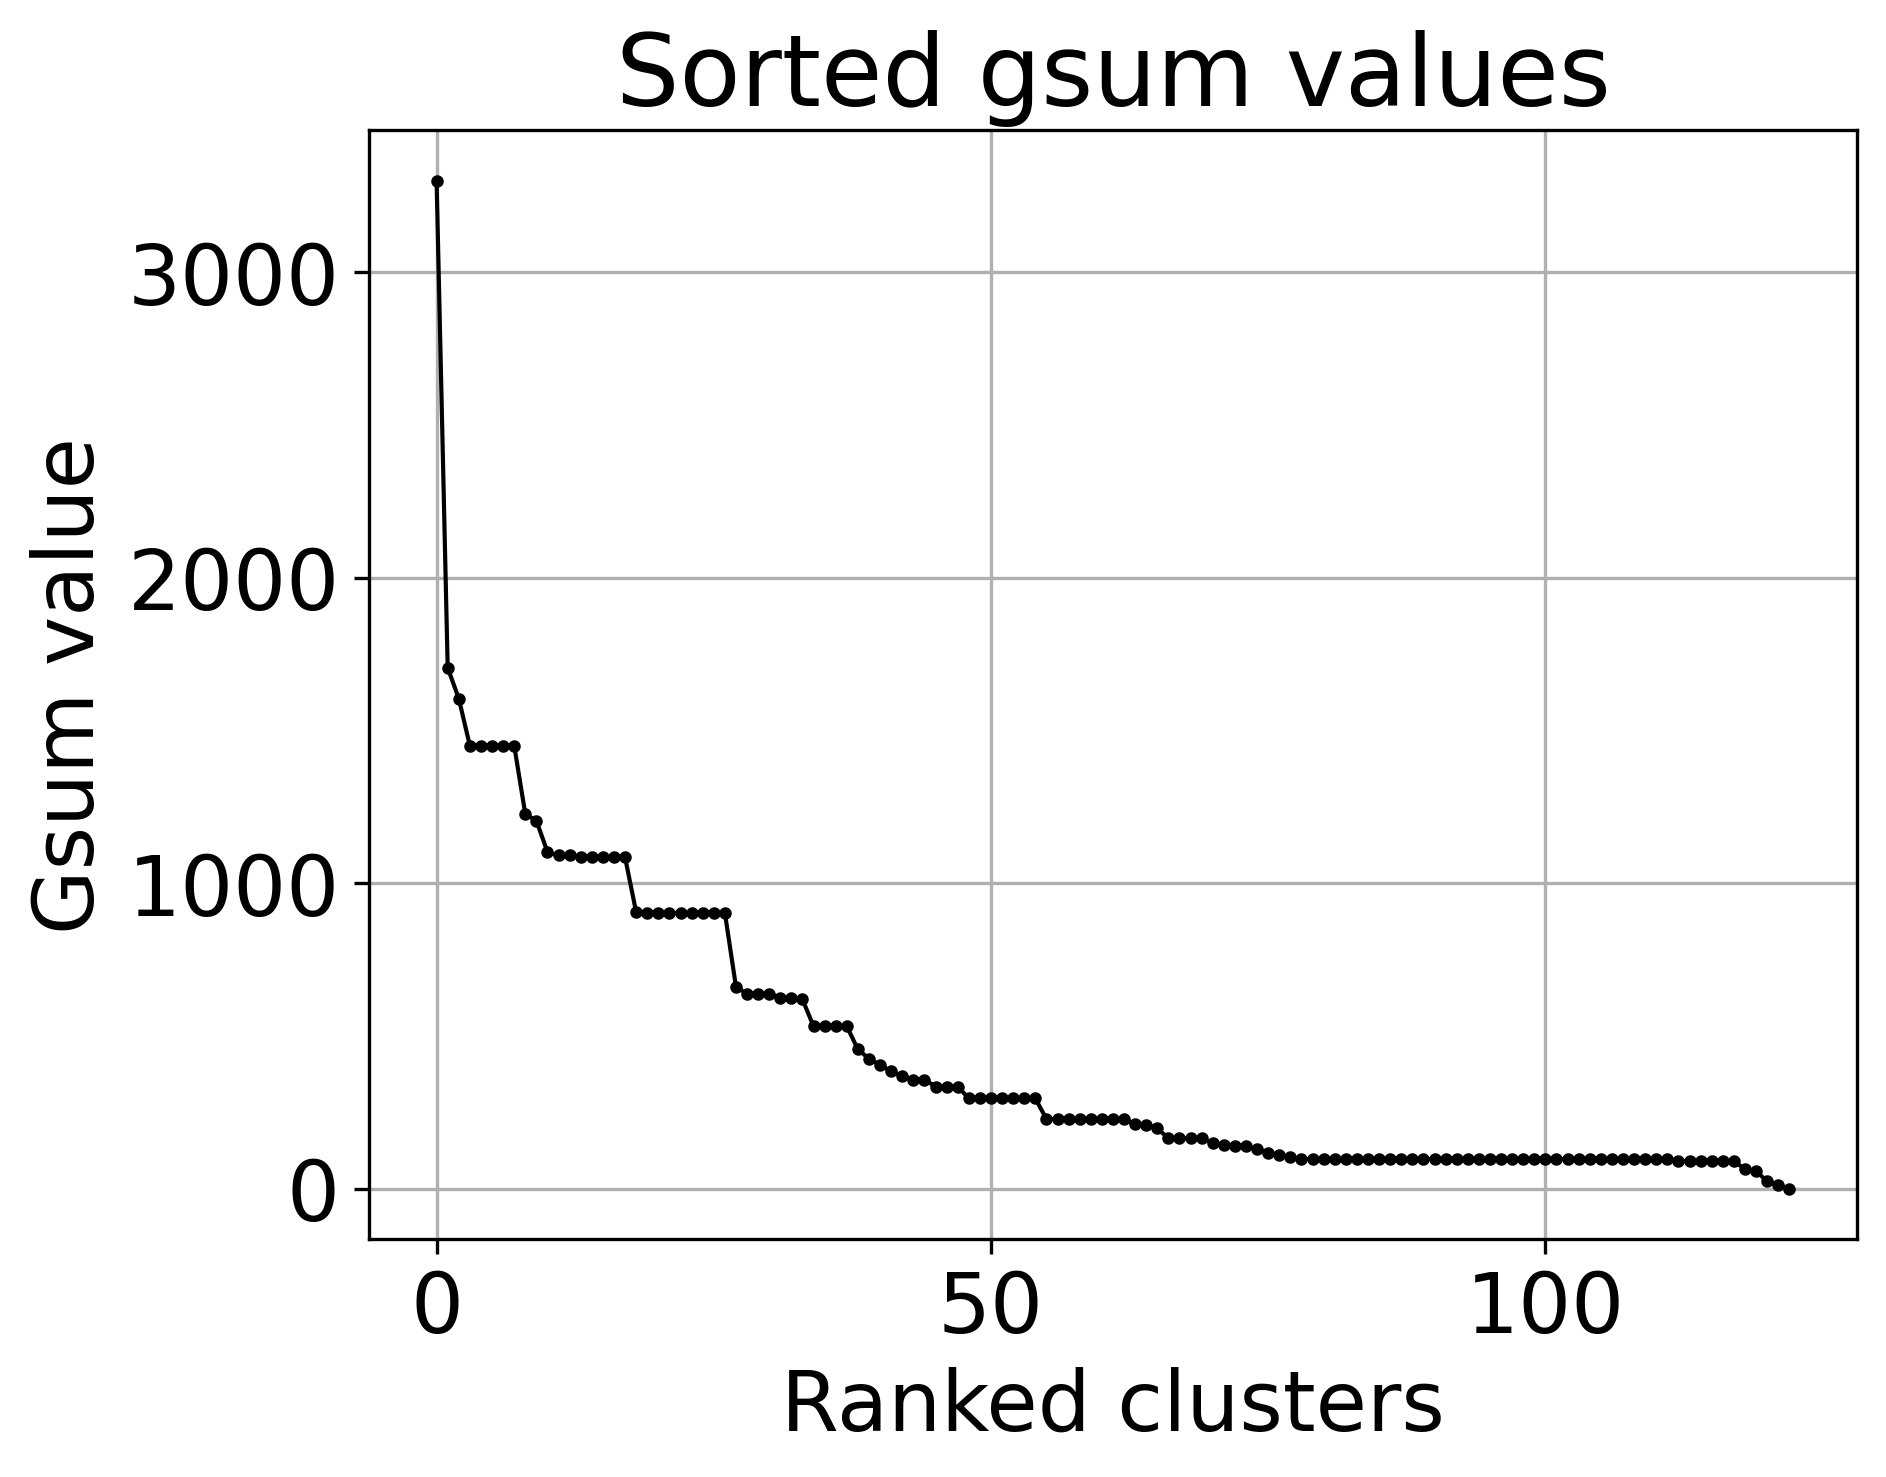

In [22]:
file_path = 'som_results/SCE/'
file_name = 'multimap_mappings.txt'

from aweSOM.make_sce_clusters import get_gsum_values, plot_gsum_values

ranked_gsum_list, map_list = get_gsum_values(file_path+file_name)

plot_gsum_values(ranked_gsum_list)


In the simplest case, add all gsum values together to obtain final SCE clustering result

In [23]:
sce_sum = np.zeros((len(iris_data_transformed)))
for i in range(len(ranked_gsum_list)):
    current_cluster_mask = np.load(f"{file_path}/mask-{map_list[i][2]}-id{map_list[i][1]}.npy")
    sce_sum += current_cluster_mask

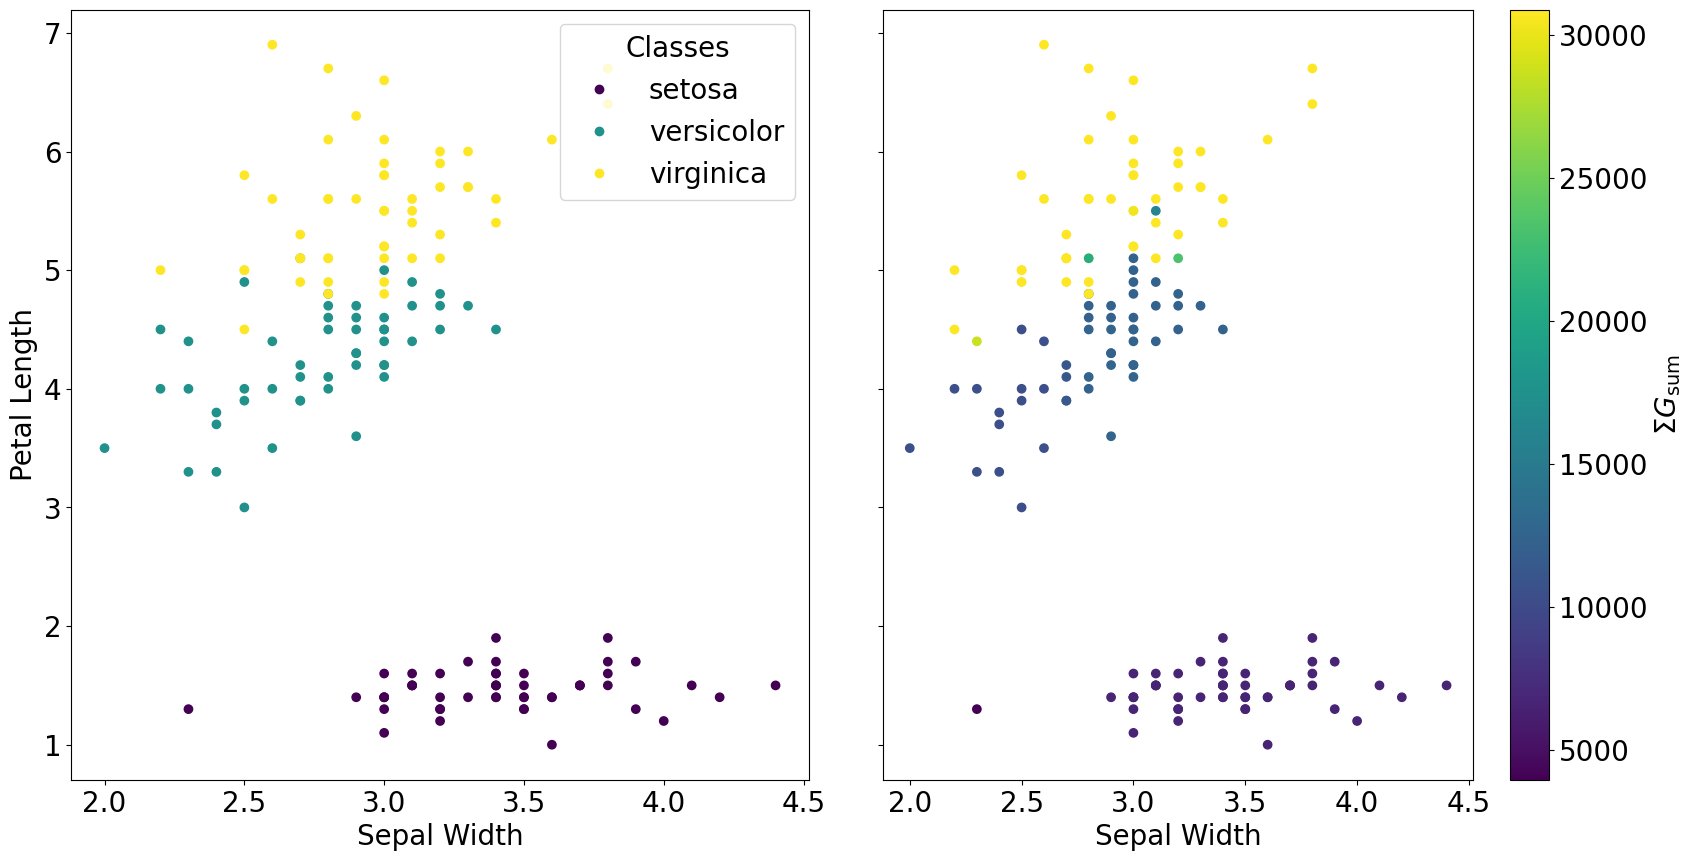

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.subplots_adjust(wspace=0.1)
scatter_ground = axs[0].scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap='viridis')
axs[0].set_xlabel('Sepal Width')
axs[0].set_ylabel('Petal Length')
axs[0].legend(scatter_ground.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")
scatter_sce = axs[1].scatter(iris.data[:,1], iris.data[:,2], c=sce_sum, cmap='viridis')
axs[1].set_xlabel('Sepal Width')
cbar = plt.colorbar(scatter_sce, ax=axs[1])
cbar.set_label(r'$\Sigma G_{\rm sum}$')
plt.show()


Visualize the distribution of the SCE values

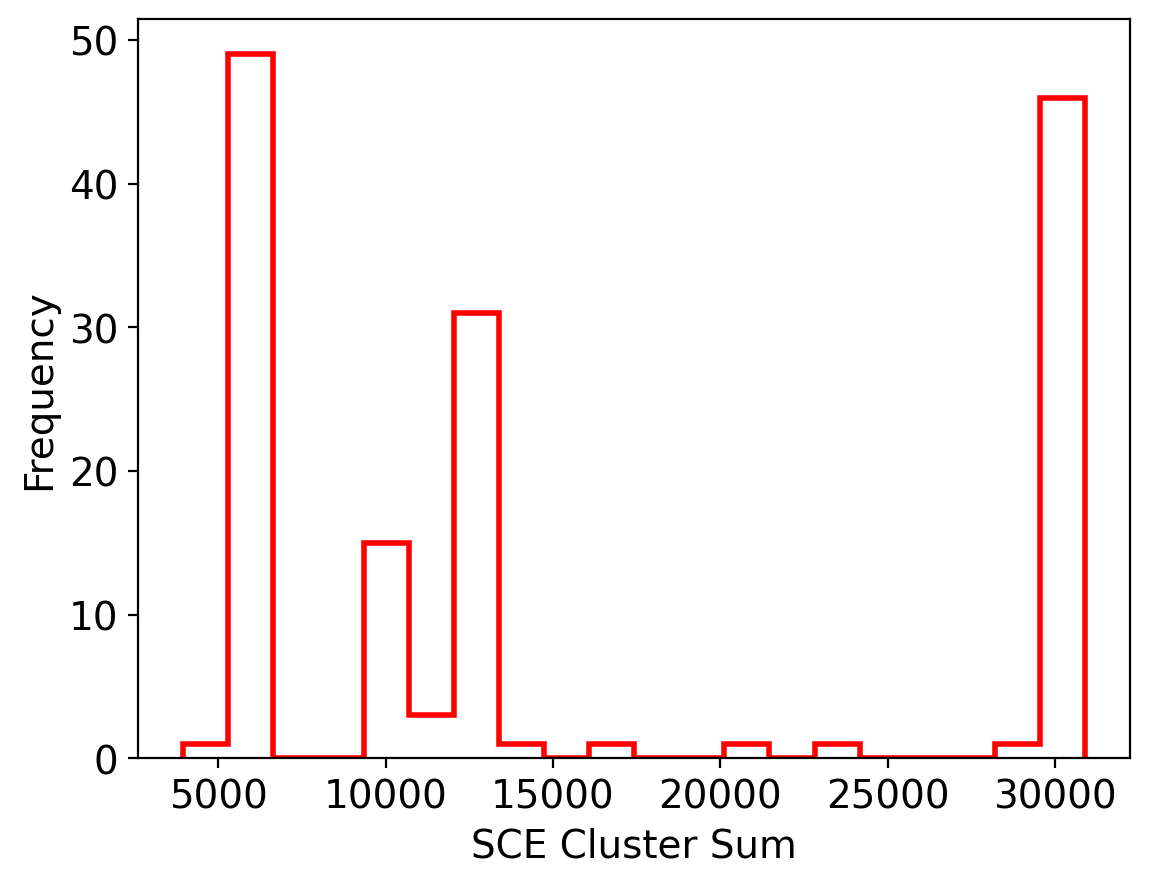

In [25]:
plt.rcParams.update({'font.size': 14})
plt.figure(dpi=200)
plt.hist(sce_sum, bins=20, color='r', label='SCE Cluster Sum', histtype='step', linewidth=2)
plt.xlabel('SCE Cluster Sum')
plt.ylabel('Frequency')
plt.show()

Set a cutoff

In [28]:
signal_cutoff = [8000, 15000]

sce_clusters = np.zeros((len(iris_data_transformed)), dtype=int)
for i in range(len(sce_sum)):
    if sce_sum[i] < signal_cutoff[0]:
        sce_clusters[i] = 0
    elif sce_sum[i] < signal_cutoff[1]:
        sce_clusters[i] = 1
    else:
        sce_clusters[i] = 2

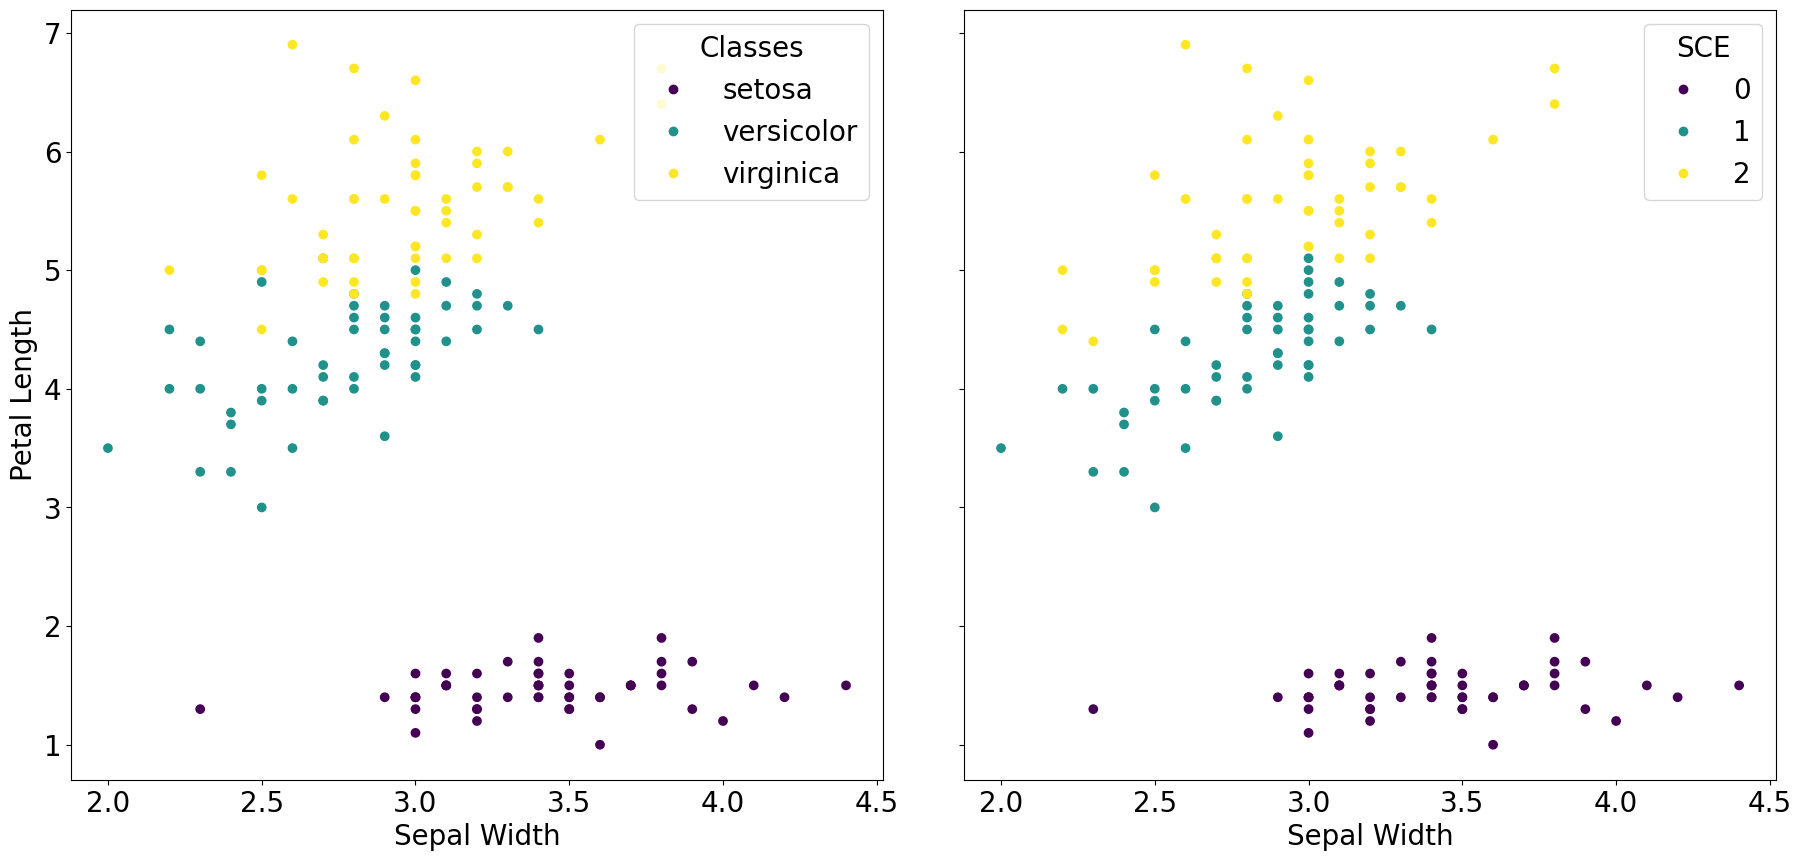

In [29]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 2, figsize=(22, 10), sharey=True)
fig.subplots_adjust(wspace=0.1)
scatter_ground = axs[0].scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap='viridis')
axs[0].set_xlabel('Sepal Width')
axs[0].set_ylabel('Petal Length')
axs[0].legend(scatter_ground.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")
scatter_sce = axs[1].scatter(iris.data[:,1], iris.data[:,2], c=sce_clusters, cmap='viridis')
axs[1].set_xlabel('Sepal Width')
axs[1].legend(scatter_sce.legend_elements()[0], np.unique(sce_clusters), loc="upper right", title="SCE")
plt.show()

Compare real labels to SCE clustering

In [30]:
# Assign cluster number to class label; change manually
label_map = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
correct_label = 0

for i in range(len(sce_clusters)):
    if int(sce_clusters[i]) == label_map[iris.target_names[iris.target[i]]]:
        correct_label += 1

print("Number of correct predictions: ", correct_label)
print("Accuracy = ", correct_label/len(sce_clusters) * 100, "%")

# Precision and Recall by class
precision = np.zeros(3)
recall = np.zeros(3)

for i in range(3):
    tp = 0
    fp = 0
    fn = 0
    for j in range(len(sce_clusters)):
        if int(sce_clusters[j]) == label_map[iris.target_names[i]]:
            if iris.target[j] == i:
                tp += 1
            else:
                fp += 1
        else:
            if iris.target[j] == i:
                fn += 1
    precision[i] = tp/(tp+fp)
    recall[i] = tp/(tp+fn)

print("Precision: ", [float(np.round(precision[i],4))*100 for i in range(3)], "%")
print("Recall: ", [float(np.round(recall[i],4))*100 for i in range(3)], "%")


Number of correct predictions:  142
Accuracy =  94.66666666666667 %
Precision:  [100.0, 92.0, 92.0] %
Recall:  [100.0, 92.0, 92.0] %
